<a href="https://colab.research.google.com/github/nedokormysh/Ai_edu_practical_ML/blob/week_2_EDA/EDA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [27]:
RANDOM_STATE = 42

Загрузим данные.

In [28]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [29]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
106,107,1,3,Salkjelsvik; Miss. Anna Kristine,female,21.0,0,0,343120,7.6500,NaN,S
850,851,0,3,Andersson; Master. Sigvard Harald Elias,male,4.0,4,2,347082,31.2750,NaN,S
462,463,0,1,Gee; Mr. Arthur H,male,47.0,0,0,111320,38.5000,E63,S
215,216,1,1,Newell; Miss. Madeleine,female,31.0,1,0,35273,113.2750,D36,C
878,879,0,3,Laleff; Mr. Kristo,male,NaN,0,0,349217,7.8958,NaN,S


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [30]:
# ваш код здесь
len(Data)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [31]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [32]:
# ваш код здесь
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски?

In [33]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [34]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [35]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [36]:
Data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [37]:
# ваш код здесь
Data['Sex'] = Data['Sex'].map({'male' : 1, 'female' : 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [38]:
# ваш код здесь
Data['Sex'].value_counts()

1    574
0    312
Name: Sex, dtype: int64

In [39]:
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

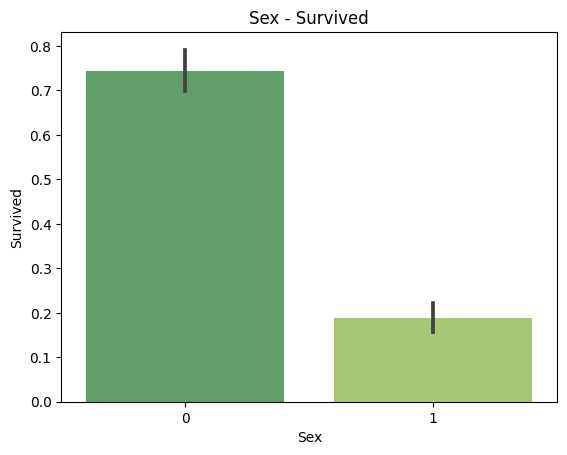

In [40]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

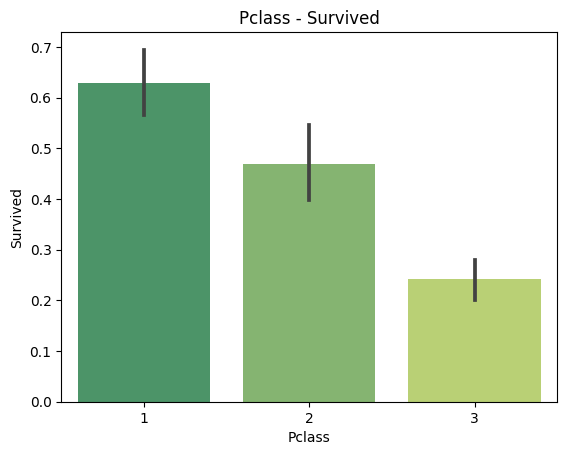

In [41]:
# ваш код здесь
sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')
plt.title('Pclass - Survived')
plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

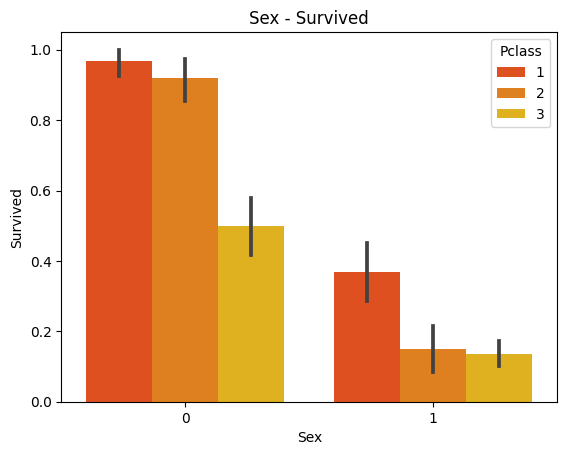

In [42]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [43]:
# ваш код здесь
Data['Embarked'].nunique()

3

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [44]:
# ваш код здесь

Data.drop('Embarked', axis=1, inplace=True)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [45]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

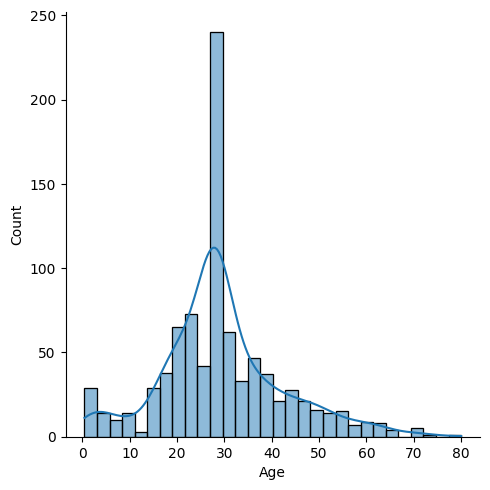

In [46]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [47]:
# ваш код здесь

Data.drop('Fare', axis=1, inplace=True)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

In [48]:
Data.shape[1]

10

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [49]:
# ваш код здесь

Data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

После минимальной обработки данных у нас получилась следующая таблица:

In [24]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [25]:
# ваш код здесь
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000


**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

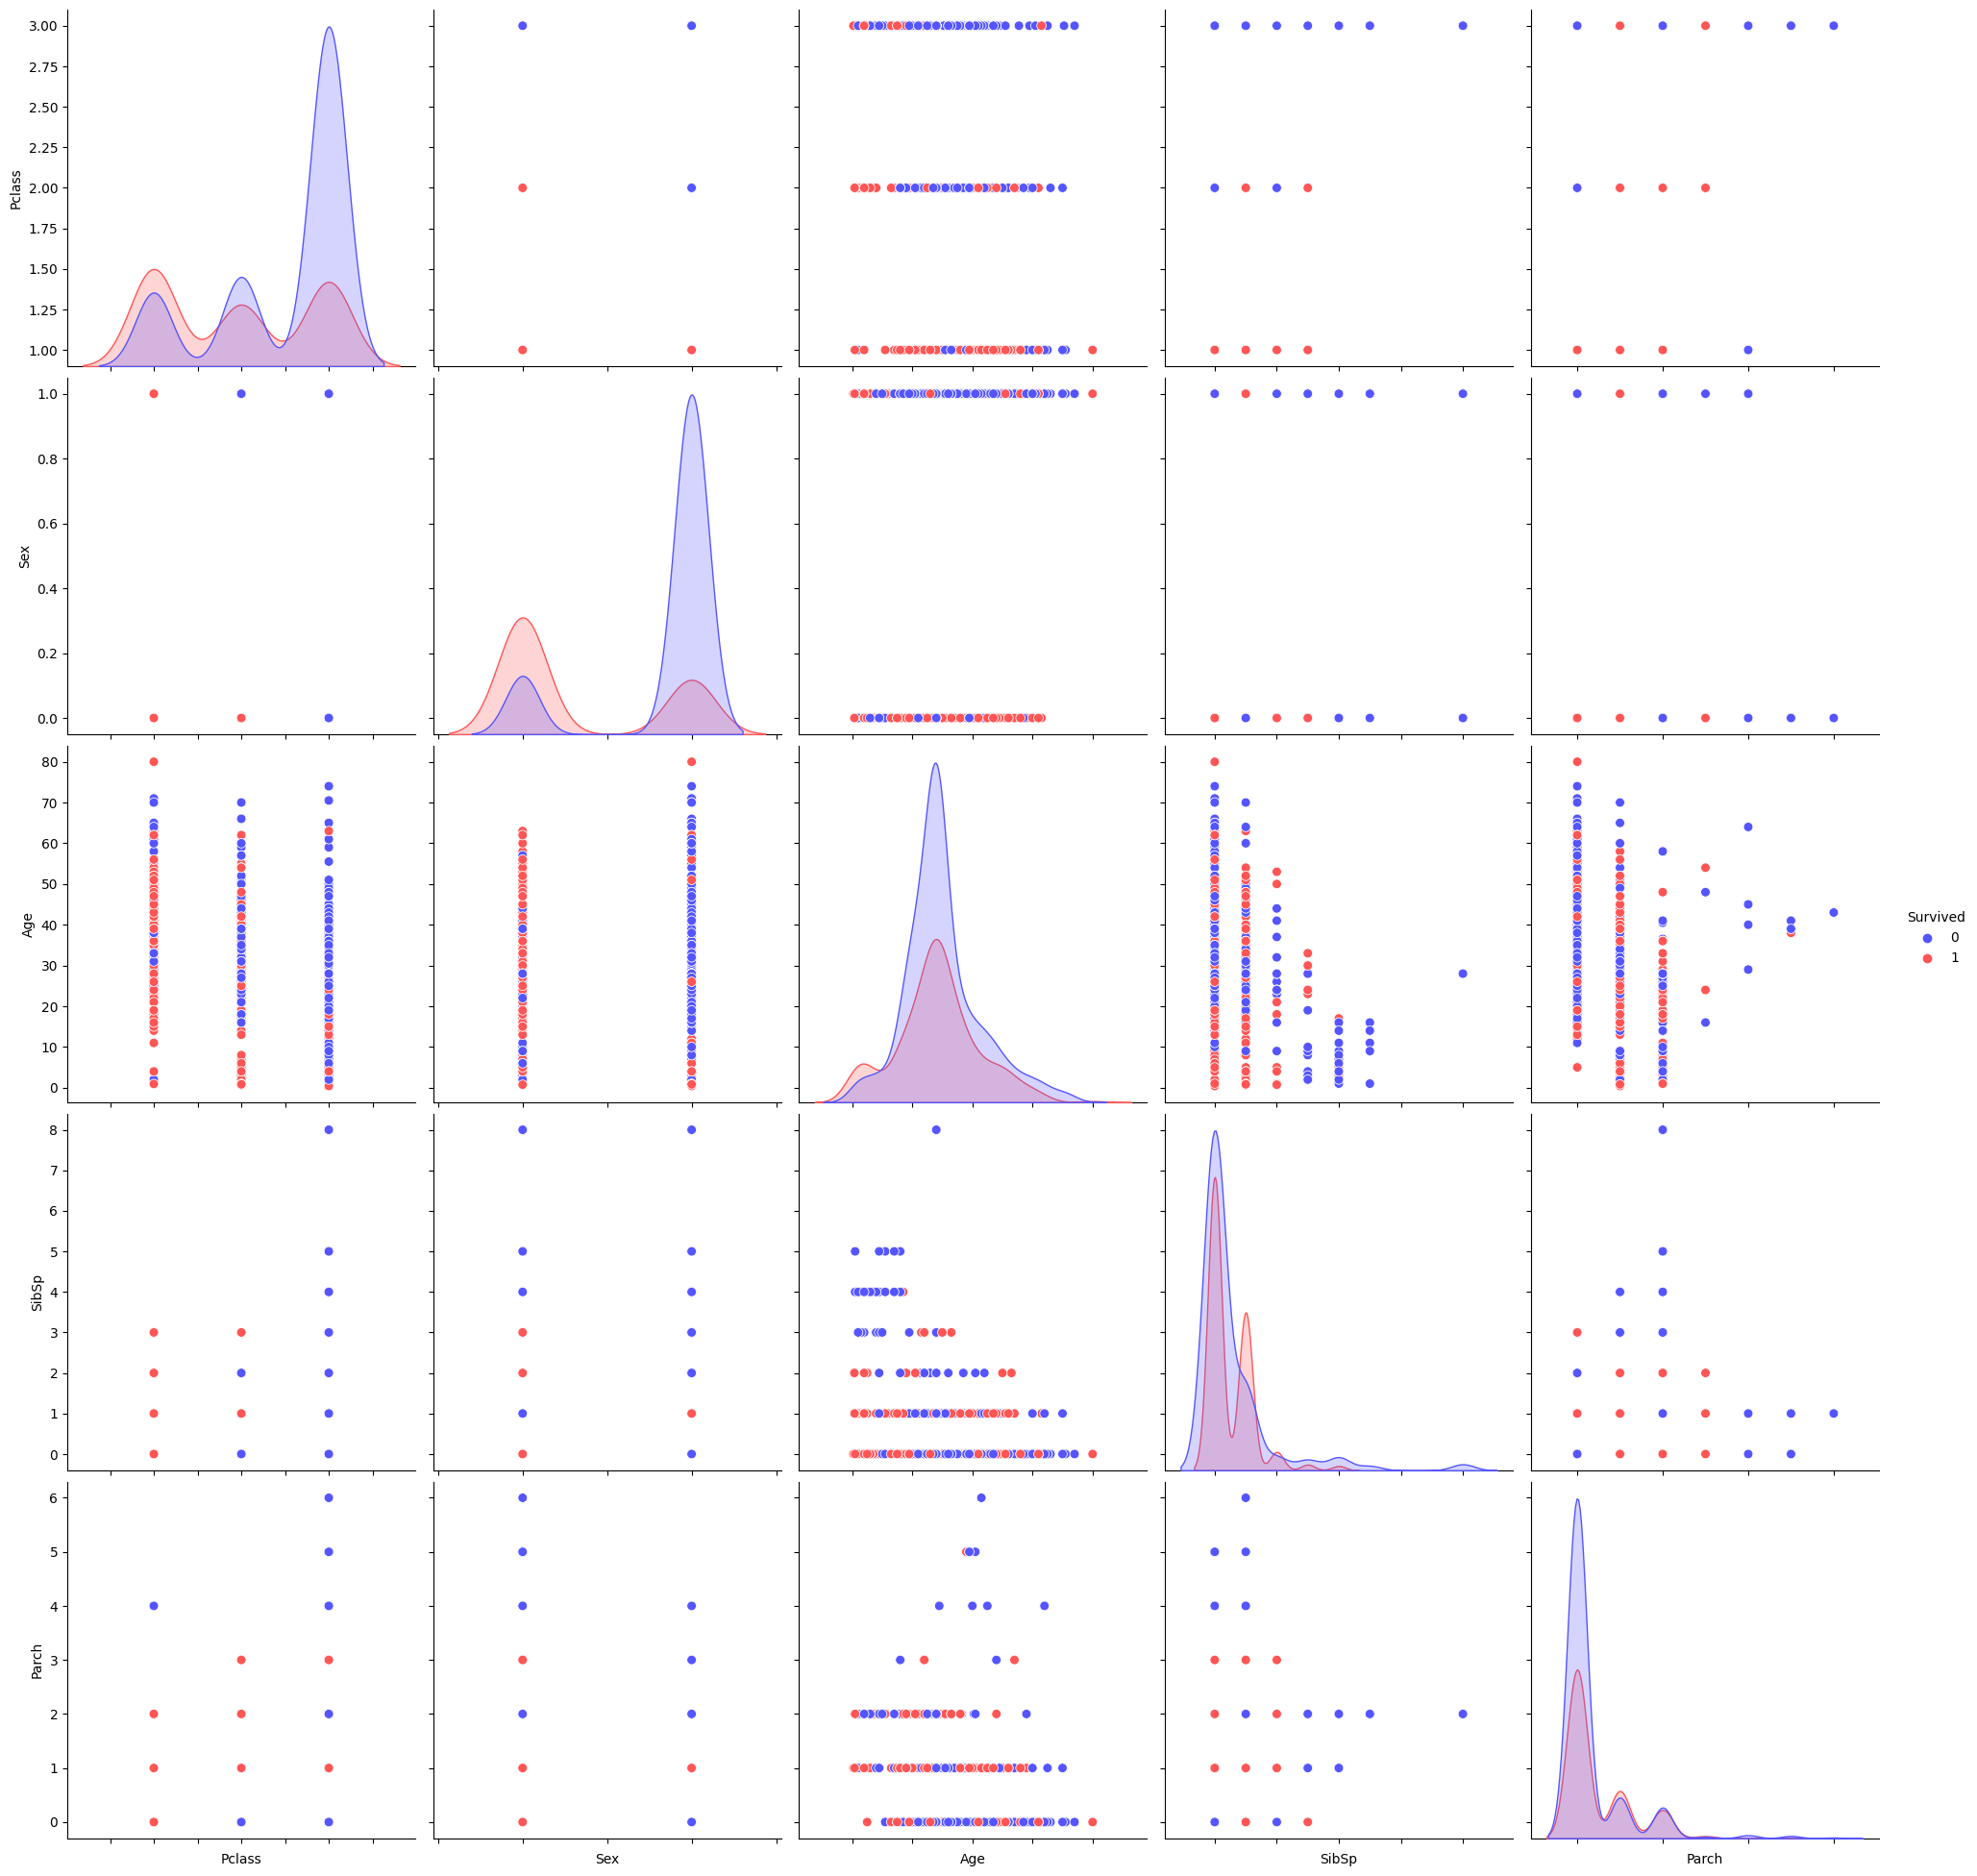

In [50]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [53]:
# Data

In [ ]:
# ваш код здесь
# Data['NameLen'] =

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [ ]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [ ]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)